## Author: Mirul Patel

In [67]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [5]:
URL="https://www.amazon.ca/s?k=iphone&crid=1IIUSXLPA9PJ7&sprefix=iphone%2Caps%2C206&ref=nb_sb_noss_1"

In [6]:
#set the headers with verified browser user-agent
HEADERS= ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36','Accept-Language':'en-US,en;q=0.5'})

In [7]:
#made request
webpage=requests.get(URL,headers=HEADERS)
webpage

<Response [200]>

In [9]:
type(webpage.content)

bytes

In [10]:
#to convert bytes to proper HTmL format
soup = BeautifulSoup(webpage.content,"html.parser")
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-ca"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [19]:
link=soup.find_all("a",attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [14]:
link

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&amp;adId=A10070002A1WTLCY6XMWF&amp;qualifier=1683736180&amp;id=4095666810927869&amp;widgetName=sp_atf&amp;url=%2FApple-Leather-Folio-iPhone-Pro%2Fdp%2FB086344R9H%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1IIUSXLPA9PJ7%26keywords%3Diphone%26qid%3D1683736180%26sprefix%3Diphone%252Caps%252C206%26sr%3D8-1-spons%26psc%3D1"><span class="a-size-base-plus a-color-base a-text-normal">Apple iPhone 11 Pro Leather Folio - Peacock</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&amp;adId=A10057082CM25SHPICI65&amp;qualifier=1683736180&amp;id=4095666810927869&amp;widgetName=sp_atf&amp;url=%2FApple-Leather-Folio-iPhone-Pro%2Fdp%2FB08633YY8P%2Fref%3Dsr_1_2_sspa%3Fcrid%3D1IIUSXLPA9PJ7%26keywords%3Diphone%26qid%3D1683736

In [20]:
links = link[6].get('href')

In [21]:
product_list="https://amazon.ca" + links
product_list

'https://amazon.ca/Apple-iPhone-12-Mini-64GB/dp/B08PP43P1V/ref=sr_1_7?crid=1IIUSXLPA9PJ7&keywords=iphone&qid=1683736180&sprefix=iphone%2Caps%2C206&sr=8-7'

In [22]:
new_webpage=requests.get(product_list,headers=HEADERS)
new_soup=BeautifulSoup(new_webpage.content,"html.parser")

In [23]:
type(new_soup)

bs4.BeautifulSoup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-ca"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
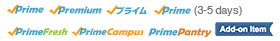

In [25]:
new_soup

In [43]:
products=new_soup.find("span",attrs={"id":'productTitle'}).text.strip()

In [44]:
products

'Apple iPhone 12 Mini, 64GB, Red - Fully Unlocked (Renewed)'

In [54]:
product_price=new_soup.find("span",attrs={"class":'a-price a-text-price a-size-medium apexPriceToPay'}).text

In [59]:
product_price[:7]

'$448.99'

In [60]:
new_soup.find("span",attrs={"class":'a-price a-text-price a-size-medium apexPriceToPay'}).find("span",attrs={'class':'a-offscreen'}).text

'$448.99'

In [61]:
new_soup.find("span",attrs={'class':'a-icon-alt'}).text

'4.2 out of 5 stars'

In [74]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'id':'a-price a-text-price a-size-medium apexPriceToPay'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'a-price-whole'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4 cm-cr-review-stars-spacing-big'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available


In [75]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.ca/s?k=iphone&ref=nb_sb_noss"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.ca" + link, headers=HEADERS)

        #converted bytes into html format
        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [76]:
amazon_df

,title,price,rating,reviews,availability
0,Apple iPhone 11 Pro Leather Folio - Peacock,,4.3 out of 5 stars,24 ratings,In Stock
1,Apple iPhone 11 Pro Max Leather Folio - Raspberry,,4.2 out of 5 stars,45 ratings,In Stock
2,Apple iPhone 11 Pro Max Clear Case,,4.6 out of 5 stars,"17,583 ratings",In Stock
3,Apple iPhone 14 Clear Case with MagSafe ​​​​​​​,,4.5 out of 5 stars,280 ratings,In Stock
4,"Apple iPhone SE 2020 (64GB, 3GB) 4.7"" Retina I...",,4.3 out of 5 stars,"2,968 ratings",In Stock.
5,"Apple iPhone 12, 64GB, Blue - Fully Unlocked (...",,4.2 out of 5 stars,"5,422 ratings",Only 2 left in stock.
6,"Apple iPhone 12 Mini, 64GB, Red - Fully Unlock...",,4.2 out of 5 stars,"4,508 ratings",Only 1 left in stock.
7,"Apple iPhone 8, 64GB, Silver (Renewed)",,4.3 out of 5 stars,"4,260 ratings",Only 4 left in stock.
8,"Apple iPhone 11, US Version, 64GB, Black - Unl...",,4.3 out of 5 stars,"7,838 ratings",In Stock.
9,"Apple iPhone 8 64 GB, Space Grey (Renewed)",,4.4 out of 5 stars,"1,238 ratings",In Stock.
